In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import linear_regression as lr  # my own module

%reload_ext autoreload
%autoreload 2
%matplotlib inline
sns.set(context="notebook", style="darkgrid", palette="dark")

In [5]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 1. normalize data

In [6]:
data = lr.normalize_feature(raw_data)
data.insert(loc=0, column='ones', value=1)  # this data.insert happend inplace..
data.head()

,ones,square,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


# 2. multi-var batch gradient decent

In [7]:
alpha = 0.01
theta = np.zeros(3)  # have 2+1 features now
epoch = 1000

In [8]:
X = lr.get_X(data)
print(X.shape, type(X))

y = lr.get_y(data)
print(y.shape, type(y))

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [9]:
theta, cost = lr.batch_gradient_decent(X, y, theta, alpha, epoch)

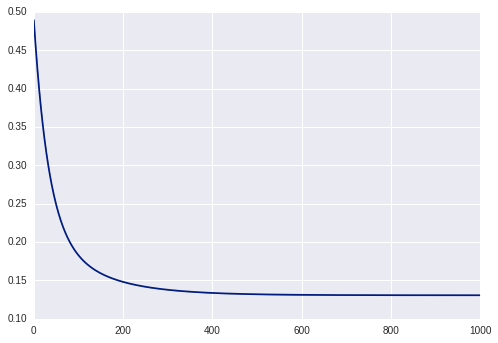

In [10]:
sns.tsplot(time=np.arange(len(cost)), data = cost)

In [11]:
theta

array([ -1.03097200e-16,   8.78503652e-01,  -4.69166570e-02])